In [1]:
#timestep.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot evolution of self-confining ringlet using different timesteps

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'initial_orbits = ', initial_orbits
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()

r.shape =  (1001, 2, 61)
total_ring_mass =  1.5e-09
shear_viscosity =  3e-13
bulk_viscosity =  3e-13
initial_orbits =  {'w_prime': 0.0, 'shape': 'eccentric', 'e': 0.005, 'e_prime': 0.0}
e.min() =  0.0026583294476433933
e.max() =  0.005982756158789254


In [3]:
#time in units of viscous timescale
viscous_timescale = (radial_width**2)/(12*shear_viscosity)
print 'viscous_timescale = ', viscous_timescale
times_viscous = times/viscous_timescale

viscous_timescale =  69444.4444444


In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [5]:
#compute delta_a=a_outer-a_inner versus time
a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
a_inner = a[:, 0, :].mean(axis=1)
a_avg = (a_inner + a_outer)/2
delta_a = a_outer - a_inner

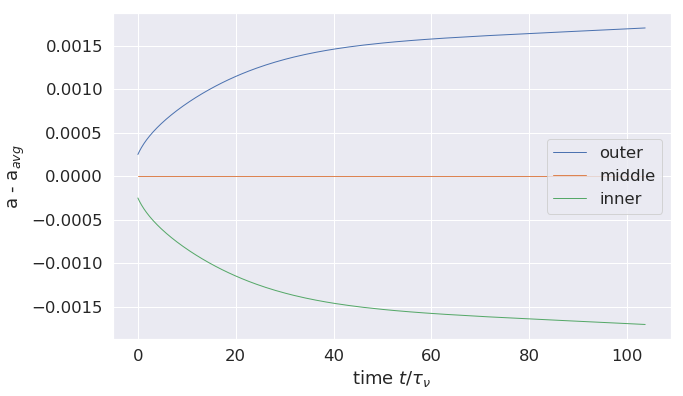

In [6]:
#plot streamline's mutual a-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = a_outer - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='outer')
y = a_avg - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='middle')
y = a_inner - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='inner')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('a - a$_{avg}$')
p = plt.legend(loc='center right')

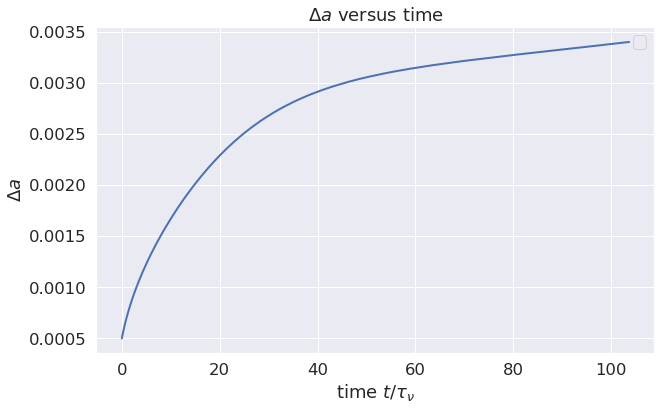

In [7]:
#plot delta_a versus time
x = times_viscous
y = delta_a
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r'$\Delta a$ versus time')
p = ax.set_ylabel(r'$\Delta a$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

In [8]:
#compute delta_e=e_outer-e_inner and e_prime = a_mid*delta_e/delta_a versus time
e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
e_inner = e[:, 0, :].mean(axis=1)
e_avg = (e_inner + e_outer)/2
delta_e = e_outer - e_inner
e_prime = a_avg*delta_e/delta_a

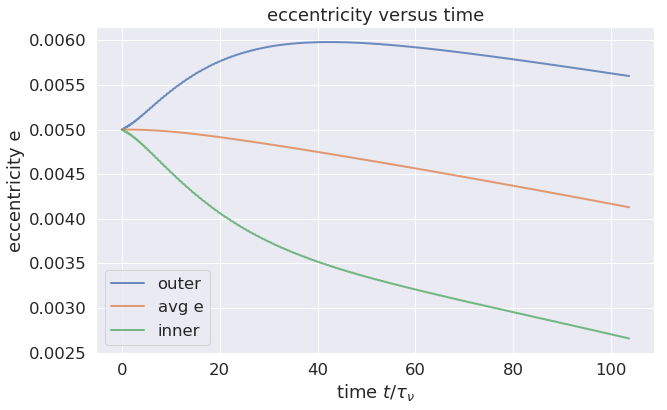

In [9]:
#plot streamline's e-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
y = e_avg
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='avg e')
y = e_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
p = ax.set_title('eccentricity versus time')
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

In [10]:
#compute inner streamline's periapse distance and outer streamline's apo
q_inner = a_inner*(1.0 - e_inner)
Q_outer = a_outer*(1.0 + e_inner)

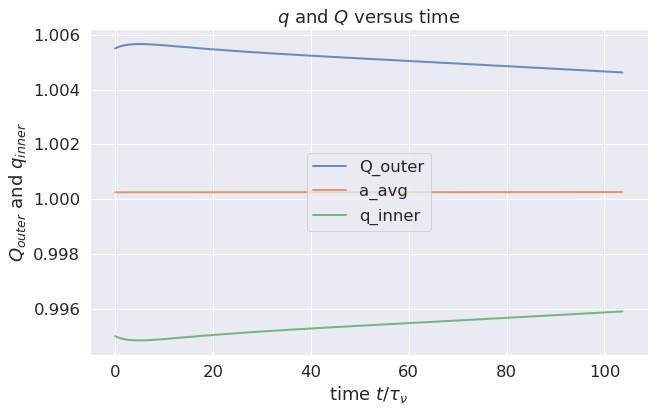

In [11]:
#plot streamline's qQ-evolution
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = Q_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='Q_outer')
y = a_avg
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='a_avg')
y = q_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='q_inner')
p = ax.set_title('$q$ and $Q$ versus time')
p = ax.set_ylabel(r'$Q_{outer}$ and $q_{inner}$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend(loc='center')

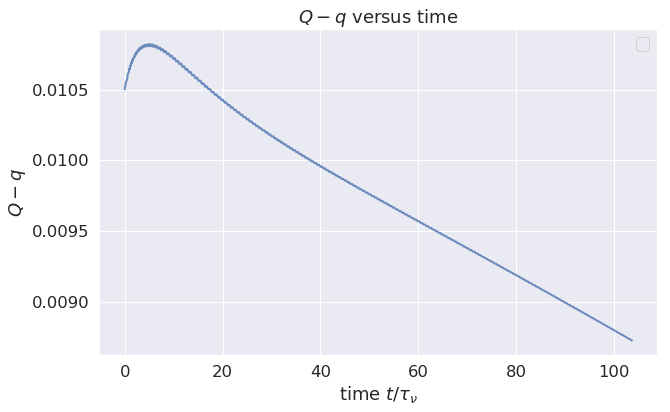

In [12]:
#plot streamline's Q-q
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = Q_outer - q_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8)
p = ax.set_title('$Q-q$ versus time')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$Q-q$')
p = plt.legend()

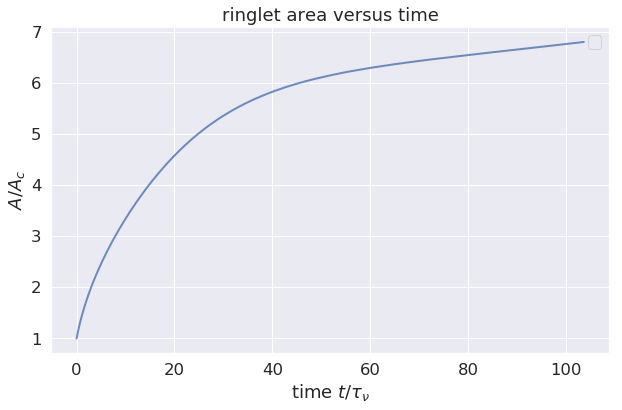

In [13]:
#plot ringlet area over time
area_outer = np.pi*(a_outer**2)*np.sqrt(1.0 - e_outer**2)
area_inner = np.pi*(a_inner**2)*np.sqrt(1.0 - e_inner**2)
area = area_outer - area_inner
area_circular = np.pi*(a_outer**2 - a_inner**2)
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = area/area_circular[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8)
p = ax.set_title('ringlet area versus time')
p = ax.set_ylabel(r'$A/A_c$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

In [14]:
#compute delta_w=wt_outer-wt_inner and wt_prime = a_mid*e_mid*delta_wt/delta_a 
#and q=sqrt(e_prime^2 + wt_prime^2) versus time
delta_wt_list = []
for t_idx in range(len(times)):
    s_idx = 0
    r0 = r[t_idx, s_idx]
    theta_idx = np.argmin(r0)
    wt_inner = wt[t_idx, s_idx, theta_idx]
    s_idx = 1
    r0 = r[t_idx, s_idx]
    theta_idx = np.argmin(r0)
    wt_outer = wt[t_idx, s_idx, theta_idx]
    delta_wt_list += [wt_outer - wt_inner]
delta_wt = adjust_angle(np.array(delta_wt_list))
wt_prime = a_avg*e_avg*delta_wt/delta_a
q = np.sqrt(e_prime**2 + wt_prime**2)

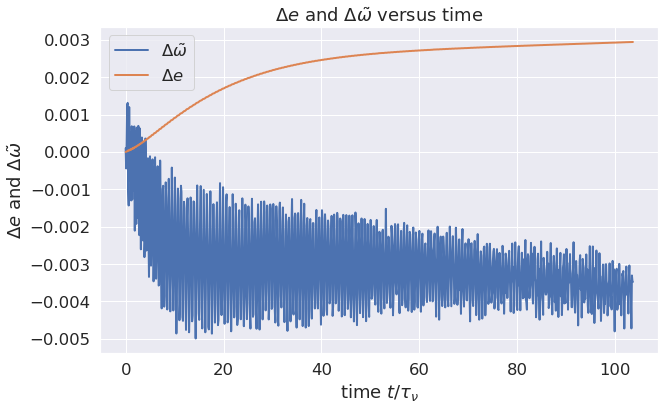

In [15]:
#plot delta_e and delta_wt versus time
x = times_viscous
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta\tilde{\omega}$')
y = delta_e
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta e$')
p = ax.set_title(r'$\Delta e$ and $\Delta\tilde{\omega}$ versus time')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta e$ and $\Delta\tilde{\omega}$')
p = plt.legend()

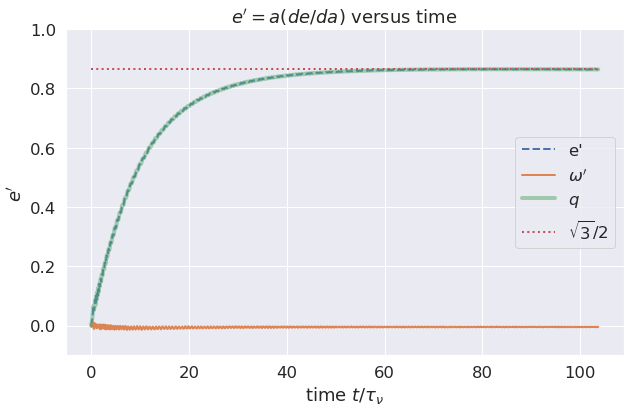

In [16]:
#plot e_prime wt_prime and q versus time
x = times_viscous
y = e_prime
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='dashed', linewidth=2, label="e'")
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r"$\omega'$")
y = q
p = ax.plot(x, y, linestyle='-', linewidth=4, label=r'$q$', alpha=0.5)
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_title(r"$e'=a(de/da)$ versus time")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r"$e'$")
p = ax.set_ylim(-0.1, 1)
p = plt.legend()

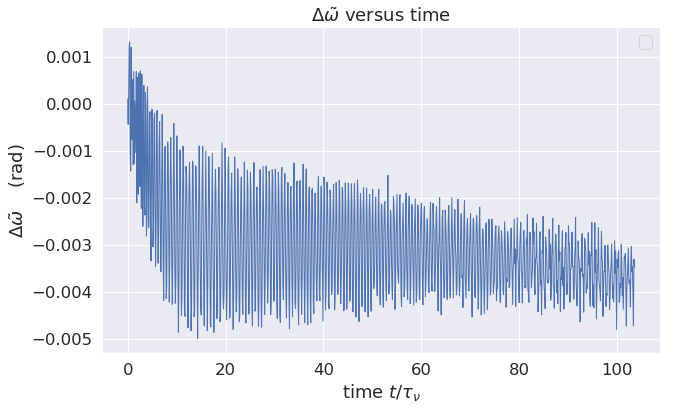

In [17]:
#plot delta_wt versus time
x = times_viscous
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title(r'$\Delta\tilde{\omega}$ versus time')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (rad)')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

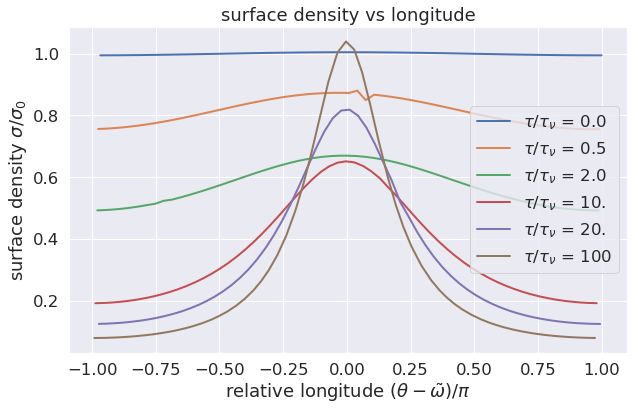

In [18]:
#plot surface density vs longitude
f, ax = plt.subplots(figsize=(10, 6))
t_idxs = (np.array([0.0, 0.005, 0.02, 0.1, 0.18, 0.23, 0.35, 0.45, 0.8])*total_number_of_outputs).astype(int)
plot_times = [0.0, 0.5, 2.0, 10.0, 20.0, 100.0]
middle_index = number_of_streamlines/2
for plot_time in plot_times:
    t_idx = np.where(times_viscous >= plot_time)[0][0]
    r_now = r[t_idx]
    t_now = t[t_idx]
    wt_now = wt[t_idx]
    delta_r = delta_f(r_now, t_now)
    sd_now = surface_density(lambda0, delta_r)
    r_middle = r_now[middle_index]
    t_middle = t_now[middle_index]
    wt_middle = wt_now[middle_index]
    sd_middle = sd_now[middle_index]
    pidx = r_middle.argmin()
    wt_min = wt_middle[pidx]
    t_rotating = adjust_angle(t_middle - wt_min)
    if (t_idx == 0):
        sd_initial = sd_now.mean()
    y = sd_middle/sd_initial
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    N_orbits = times[t_idx]/twopi/1.0e5
    lbl = r'$\tau/\tau_\nu$ = ' + str(times_viscous[t_idx])[0:3]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'surface density vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'surface density $\sigma/\sigma_0$')
p = plt.legend(loc='center right')

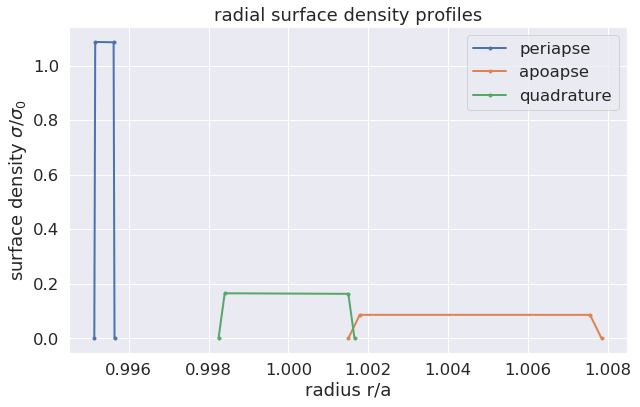

In [19]:
#plot radial cuts of surface density
t_idx = total_number_of_outputs/2
r_now = r[t_idx]
t_now = t[t_idx]
wt_now = wt[t_idx]
delta_r = delta_f(r_now, t_now)
sd_now = surface_density(lambda0, delta_r)
r_middle = r_now[middle_index]
#sd(r) along periapse
idx = r_middle.argmin()
idx_peri = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.05*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.05*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded)
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
f, ax = plt.subplots(figsize=(10, 6))
xp = r_padded/a_avg[t_idx]
yp = sd_padded/sd_initial
p = ax.plot(xp, yp, linestyle='-', linewidth=2, marker='o', markersize=3, label='periapse')
#sd(r) along apoapse
idx = r_middle.argmax()
idx_apo = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.05*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.05*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded)
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/a_avg[t_idx]
yp = sd_padded/sd_initial
p = ax.plot(xp, yp, linestyle='-', linewidth=2, marker='o', markersize=3, label='apoapse')
#sd(r) along quadrature
idx = (idx_peri + idx_apo)/2
idx_quad = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.05*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.05*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded)
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/a_avg[t_idx]
yp = sd_padded/sd_initial
p = ax.plot(xp, yp, linestyle='-', marker='o', linewidth=2, markersize=3, label='quadrature')
p = ax.set_title(r'radial surface density profiles')
p = ax.set_xlabel(r'radius r/a')
p = ax.set_ylabel(r'surface density $\sigma/\sigma_0$')
p = ax.legend()